# Multi Output Regression

In [1]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 1.5 MB/s eta 0:00:00


In [2]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from kaggle_secrets import UserSecretsClient


user_secrets = UserSecretsClient()
wandb_key = user_secrets.get_secret("wandb_key")

SEED = 42

In [3]:
pub = pd.read_csv('../input/kdd-team/public.csv')
print(pub.shape)
pub.head()

(146262, 5)


,Filename,Altitude,Delta,North,East
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231,-0.386045,0.929772
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688,0.635584,0.152819
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576,-1.228229,-0.499388
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981,-1.739709,-0.699928
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156,-0.169798,2.828752


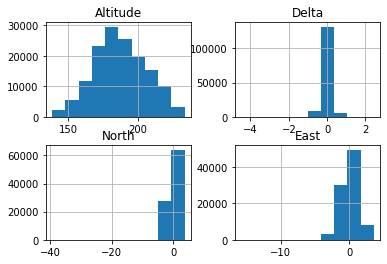

In [4]:
pub.hist();

In [5]:
pixels_dist = pd.read_csv('../input/kdd-team/pixels_dist.csv')
print(pixels_dist.shape)
pixels_dist.head()

(91231, 3)


,Images,North_pixel,East_pixel
0,00003e3b9e5336685200ae85d21b4f5e.jpg,-1.098183,2.828369
1,0001261e2060303a06ba6c64d676d639.jpg,1.452448,0.207358
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,-3.544215,-1.494362
3,0004289ee1c7b8b08c77e19878106ae3.jpg,-6.054061,-4.082150
4,0004d0b59e19461ff126e3a08a814c33.jpg,-0.690250,8.232869


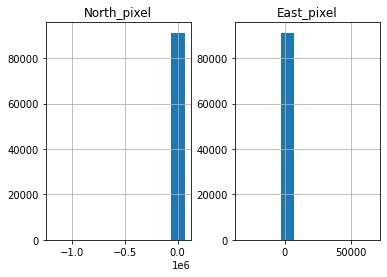

In [6]:
pixels_dist.hist();

In [7]:
pixels_dist_final = pd.read_csv('../input/kdd-team/pixels_dist_final.csv')
print(pixels_dist_final.shape)
pixels_dist_final.head()

(55031, 3)


,Images,North_pixel,East_pixel
0,000053b1e684c9e7ea73727b2238ce18.jpg,3.946422,-3.815853
1,00029153d12ae1c9abe59c17ff2e0895.jpg,7.668228,-4.031865
2,0006246bee639c7a7b11a08e34dd3cc6.jpg,-11.549439,-0.880645
3,00063cb5da1826febf178b669eea3250.jpg,-28.991636,1.930891
4,00063ece2e68a8847f228e8fd922f851.jpg,0.184479,-6.925782


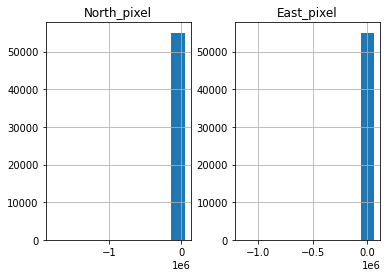

In [8]:
pixels_dist_final.hist();

In [9]:
X_train = pub[pub.North.notna()][['Filename', 'Altitude', 'Delta']].copy().reset_index(drop=True)
print(X_train.shape)
X_train.head()


(91231, 3)


,Filename,Altitude,Delta
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156


In [10]:
if all(X_train.Filename == pixels_dist.Images):
    print('same index!')
    X_train = pd.concat([X_train, pixels_dist.iloc[:, -2:]], axis=1)
    
print(X_train.shape)
X_train.head()

same index!
(91231, 5)


,Filename,Altitude,Delta,North_pixel,East_pixel
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231,-1.098183,2.828369
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688,1.452448,0.207358
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576,-3.544215,-1.494362
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981,-6.054061,-4.082150
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156,-0.690250,8.232869


In [11]:
y_train = pub[pub.North.notna()][['North', 'East']].copy().reset_index(drop=True)
print(y_train.shape)
y_train.head()

(91231, 2)


,North,East
0,-0.386045,0.929772
1,0.635584,0.152819
2,-1.228229,-0.499388
3,-1.739709,-0.699928
4,-0.169798,2.828752


In [12]:
X_test = pub[~pub.North.notna()][['Filename', 'Altitude', 'Delta']].copy().reset_index(drop=True)
print(X_test.shape)
X_test.head()


(55031, 3)


,Filename,Altitude,Delta
0,000053b1e684c9e7ea73727b2238ce18.jpg,167.943069,0.010269
1,00029153d12ae1c9abe59c17ff2e0895.jpg,195.853088,0.089218
2,0006246bee639c7a7b11a08e34dd3cc6.jpg,146.943466,-0.018326
3,00063cb5da1826febf178b669eea3250.jpg,213.184418,-0.108704
4,00063ece2e68a8847f228e8fd922f851.jpg,184.757767,0.017700


In [13]:
if all(X_test.Filename == pixels_dist_final.Images):
    print('same index!')
    X_test = pd.concat([X_test, pixels_dist_final.iloc[:, -2:]], axis=1)
    
print(X_test.shape)
X_test.head()

same index!
(55031, 5)


,Filename,Altitude,Delta,North_pixel,East_pixel
0,000053b1e684c9e7ea73727b2238ce18.jpg,167.943069,0.010269,3.946422,-3.815853
1,00029153d12ae1c9abe59c17ff2e0895.jpg,195.853088,0.089218,7.668228,-4.031865
2,0006246bee639c7a7b11a08e34dd3cc6.jpg,146.943466,-0.018326,-11.549439,-0.880645
3,00063cb5da1826febf178b669eea3250.jpg,213.184418,-0.108704,-28.991636,1.930891
4,00063ece2e68a8847f228e8fd922f851.jpg,184.757767,0.017700,0.184479,-6.925782


In [14]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from feature_engine.outliers import Winsorizer
import xgboost as xgb
from sklearn.model_selection import learning_curve

scaler = StandardScaler()
winsor = Winsorizer()

ct = ColumnTransformer([('Scaler', scaler, ['Altitude'])], remainder='passthrough')
model = xgb.XGBRegressor(random_state=SEED, tree_method='gpu_hist')
pipe = Pipeline([('Winsorizer', winsor), ('Column_Transformer', ct), ('Model', model)])

folds = KFold(random_state=SEED, shuffle=True)
features = ['Altitude', 'Delta', 'North_pixel', 'East_pixel']

scores = cross_val_score(estimator=pipe,
                         X=X_train[features],
                         y=y_train,
                         scoring='neg_root_mean_squared_error',
                         cv=folds, 
                         n_jobs=1)

print('Each Fold Score: ', -scores)
print('Mean KFold Score', -scores.mean())

Each Fold Score:  [0.37697476 0.41174687 0.38165005 0.38007109 0.4221389 ]
Mean KFold Score 0.394516330931165


In [15]:
import optuna
from optuna import trial
from optuna.integration.wandb import WeightsAndBiasesCallback
import wandb

# wandb.login(key=wandb_key)
# wandb.init()
# wandb_kwargs = {"project": "kdd22"}
# wandbc = WeightsAndBiasesCallback(wandb_kwargs=wandb_kwargs, as_multirun=False)

# @wandbc.track_in_wandb()
def objective(trial):

    params = {
        'tree_method':'gpu_hist',
        'eval_metric': 'rmse',
        'max_depth':trial.suggest_int('max_depth', 1, 30),
        'eta':trial.suggest_float('eta', 1e-8, 1.0),
        'lambda':trial.suggest_float('lambda', 1e-8, 1.0),
        'gamma':trial.suggest_float('gamma', 1e-8, 1.0),
        'grow_policy':trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'alpha':trial.suggest_float('alpha', 1e-8, 1.0),
        'seed':SEED,
        
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'neg_root_mean_squared_error')
    
    model = xgb.XGBRegressor(**params)
    pipe = Pipeline([('Winsorizer', winsor), ('Column_Transformer', ct), ('Model', model)])

    scores = cross_val_score(estimator=pipe,
                             X=X_train[features],
                             y=y_train,
                             scoring='neg_root_mean_squared_error',
                             cv=folds, 
                             n_jobs=1)
    
#     print('Each Fold Score: ', -scores)
#     print('Mean KFold Score', -scores.mean())
    rmse = -scores.mean()
    
    return rmse

study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2022-10-30 00:48:02,309] A new study created in memory with name: no-name-e3cbb556-f701-433a-9ce0-4ae1611c9bed
[I 2022-10-30 00:50:27,521] Trial 0 finished with value: 1.0894607478978517 and parameters: {'max_depth': 19, 'eta': 0.001833888410665947, 'lambda': 0.7167359527940927, 'gamma': 0.500045574598077, 'grow_policy': 'depthwise', 'alpha': 0.38493849746349357}. Best is trial 0 with value: 1.0894607478978517.
[I 2022-10-30 00:50:29,845] Trial 1 finished with value: 0.41270162406869615 and parameters: {'max_depth': 12, 'eta': 0.8617065849910344, 'lambda': 0.44586790762330786, 'gamma': 0.7368961737870232, 'grow_policy': 'depthwise', 'alpha': 0.8082130844524079}. Best is trial 1 with value: 0.41270162406869615.


In [ ]:
print(study.best_trial)

In [ ]:
best_params = study.best_params
print(best_params)

model = xgb.XGBRegressor(**best_params)
pipe = Pipeline([('Winsorizer', winsor), ('Column_Transformer', ct), ('Model', model)])

In [ ]:
pipe.fit(X_train[features], y_train)
predictions = pd.DataFrame(pipe.predict(X_test[features]), columns=['North', 'East'])
predictions.head()

In [ ]:
submission = pd.concat([X_test['Filename'], predictions], axis=1)
submission = submission.melt(id_vars='Filename', value_name='Predicted')
submission['Id'] = submission.Filename + ':' + submission.variable
submission = submission[['Id', 'Predicted']]
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)